<a href="https://colab.research.google.com/github/MohammadArhamKhan/Task-1-Data-Cleaning-Preprocessing/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler ##this will help us to scale these values

In [4]:
titanic_dat=pd.read_csv('/content/Titanic-Dataset.csv')
print(titanic_dat)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [9]:
#(2)handling missing value
print(titanic_dat.isnull().sum())

median=titanic_dat['Age'].median()
titanic_dat['Age'].fillna(median,inplace=True)
print(titanic_dat.isnull().sum())
print(titanic_dat)
#mode-most repeated value
mode=titanic_dat['Embarked'].mode()[0]
titanic_dat['Embarked'].fillna(mode,inplace=True)
print(titanic_dat.isnull().sum())
print(titanic_dat)

#dropping columns with too many missig value and are irrelevant
titanic_dat.drop(['Cabin'],axis=1,inplace=True)
print(titanic_dat)




PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Se

<ipython-input-9-fdb1fad6bc87>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_dat['Age'].fillna(median,inplace=True)


In [30]:
#Convert categorical features into numerical using encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
titanic_dat["Sex"]=le.fit_transform(titanic_dat["Sex"])
"""titanic_dat["Embarked"]=le.fit_transform(titanic_dat["Embarked"])"""
print(titanic_dat)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex       Age  SibSp  \
0                              Braund, Mr. Owen Harris    0 -0.565736      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.663861      1   
2                               Heikkinen, Miss. Laina    0 -0.258337      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312      1   
4                             Allen, Mr. William Henry    0  0.433312      0   
..                                                 ...  ...    

In [24]:
#Normalize/standardize the numerical features.
scaler=StandardScaler()
scaled_data=scaler.fit_transform(titanic_dat[['Age','Fare']])
titanic_dat[['Age','Fare']]=scaled_data
print(titanic_dat)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex       Age  SibSp  \
0                              Braund, Mr. Owen Harris    0 -0.565736      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.663861      1   
2                               Heikkinen, Miss. Laina    0 -0.258337      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312      1   
4                             Allen, Mr. William Henry    0  0.433312      0   
..                                                 ...  ...    

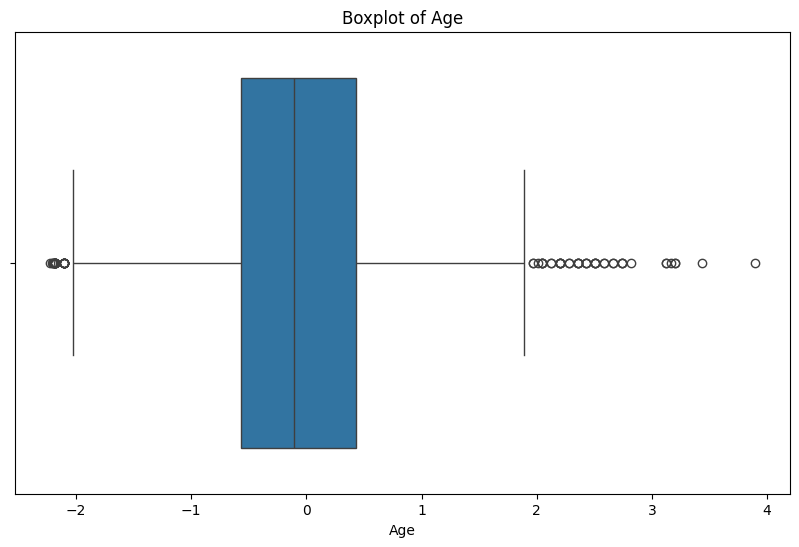

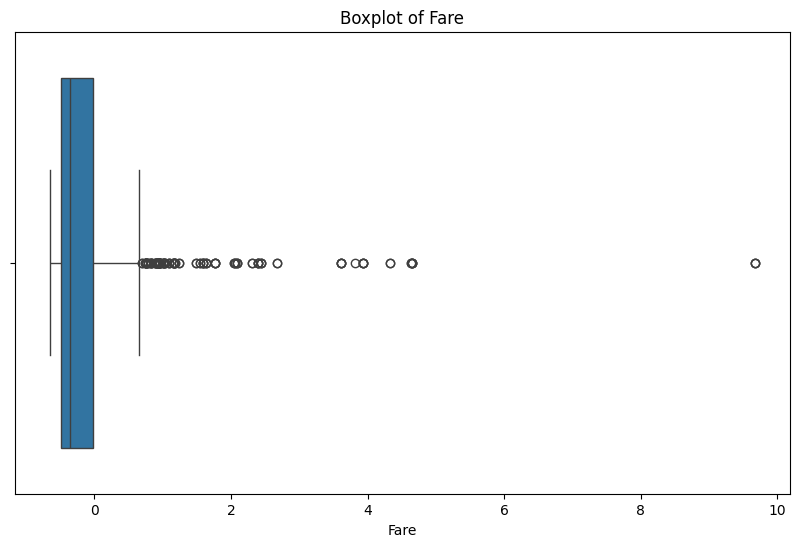

In [29]:
#Visualize outliers using boxplots and remove them
plt.figure(figsize=(10,6))
sns.boxplot(x=titanic_dat['Age'])
plt.title('Boxplot of Age')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x=titanic_dat['Fare'])
plt.title('Boxplot of Fare')
plt.show()